## **Modelo de Predicción de Morosidad para una Cartera Corporativa: Una Aplicación de Machine Learning con Variables Macroeconómicas**

## Contenido


1.   Descripción de la Base de Datos
2.   Análisis Exploratorio de Datos
3.   Aplicación Algorítmos de ML
4.   Resultados






## 1. Descripción de la Base de Datos

---



In [4]:
!pip install pandas==0.25
import pandas as pd
print({'pandas':pd.__version__})
import pandas_profiling
import numpy as np

{'pandas': '0.25.0'}


In [2]:
#Cargar Estructura de Datos
df = pd.read_excel("/content/drive/My Drive/Bases Modelo Forecast/Variables_Modelo.xlsx" )

## 1.1 Visualización de la Base

In [3]:
df.head()

Letra    C       IDAEC      EMBI  ...        ICC  RiesgoPais      Mora      Fecha
0   AMD  XXX  109.380582  6.394171  ...        NaN         NaN       NaN        NaT
1   AMD  XXX   86.619604  6.677318  ...        NaN         NaN       NaN        NaT
2   AMD  XXX   95.126519  6.019419  ...        NaN         NaN       NaN        NaT
3   AMD  XXX   95.103619  5.619382  ...        NaN         NaN       NaN        NaT
4   AMD    1   96.047812  5.669365  ...  30.408904    5.619382  0.016894 2008-05-31

[5 rows x 127 columns]

## 1.2 Descripción General de la Estructura de Datos

In [6]:
print('*** Las dimensiones del DF son:', df.shape,'\n_________________________')
print('*** Las Variables del DF son:',df.columns,'\n_________________________')
print('***',df.info(),'\n_________________________')

*** Las dimensiones del DF son: (146, 127) 
_________________________
*** Las Variables del DF son: Index(['Letra', 'C', 'IDAEC', 'EMBI', 'PrecioPetroleo', 'ICE_COMERCIO',
       'ICE_CONSTRUCCION', 'ICE_INDUSTRIA', 'ICE_SERVICIOS', 'ICE_GLOBAL',
       ...
       'VAB Real Suministro de electricidad y agua (Spline)',
       'VAB Real Transporte (Spline)', 'Desempleo (%) (Spline)',
       'Obligaciones con el público', 'ICC_presente', 'ICC_EXPECTATIVA', 'ICC',
       'RiesgoPais', 'Mora', 'Fecha'],
      dtype='object', length=127) 
_________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Columns: 127 entries, Letra to Fecha
dtypes: datetime64[ns](1), float64(124), object(2)
memory usage: 145.0+ KB
*** None 
_________________________


El conjunto de datos inicial esta compuesto por 146 observaciones (meses) y 127 variables. Estas variables contienen información de indicadores macroeconímicos que abarcan el sector real, fiscal y externo de la economía ecuatoriana. Se observa además que 124 variables son de tipo *float* mientras que una es de tipo *datatime*. Esta última es la fecha de corte de cada una de las variables en la base. 

## 1.3 Depuración de la Base

In [7]:
null_columns=df.columns[df.isnull().any()]
print('Las variables con datos pérdidos son: ',df[null_columns].isnull().sum(),'________________________')

Las variables con datos pérdidos son:  PrecioPetroleo                1
CanastaFamiliar               2
Ingresos_Totales              4
Ingresos_Petroleros           4
Ingresos_Por_exportaciones    4
                             ..
ICC_EXPECTATIVA               4
ICC                           4
RiesgoPais                    4
Mora                          4
Fecha                         4
Length: 75, dtype: int64 ________________________


Como se observa existen 75 variables que tienen datos perdidos. Estos datos se encuentran en los meses de Enero 2008 a Abril 2008, y de Sep 2019 a Feb 2020. En el primer, se procederá a eliminar esos registros dado que el vector temporal asociado a la variables dependiente empieza en mayo 2008. En el otro caso, se procederá a imputar dichos datos. 

### 1.3.1 Eliminación de Datos Perdidos




In [21]:
df_dep1= df.loc[df.Fecha >= '2008-05-01'].copy()
print(df.shape)
print(df_dep1.shape)

(146, 127)
(142, 127)


In [22]:
df_dep1['Fecha'].unique()

array(['2008-05-31T00:00:00.000000000', '2008-06-30T00:00:00.000000000',
       '2008-07-31T00:00:00.000000000', '2008-08-31T00:00:00.000000000',
       '2008-09-30T00:00:00.000000000', '2008-10-31T00:00:00.000000000',
       '2008-11-30T00:00:00.000000000', '2008-12-31T00:00:00.000000000',
       '2009-01-31T00:00:00.000000000', '2009-02-28T00:00:00.000000000',
       '2009-03-31T00:00:00.000000000', '2009-04-30T00:00:00.000000000',
       '2009-05-31T00:00:00.000000000', '2009-06-30T00:00:00.000000000',
       '2009-07-31T00:00:00.000000000', '2009-08-31T00:00:00.000000000',
       '2009-09-30T00:00:00.000000000', '2009-10-31T00:00:00.000000000',
       '2009-11-30T00:00:00.000000000', '2009-12-31T00:00:00.000000000',
       '2010-01-31T00:00:00.000000000', '2010-02-28T00:00:00.000000000',
       '2010-03-31T00:00:00.000000000', '2010-04-30T00:00:00.000000000',
       '2010-05-31T00:00:00.000000000', '2010-06-30T00:00:00.000000000',
       '2010-07-31T00:00:00.000000000', '2010-08-31

### 1.3.2 Imputación de  Variables

In [23]:
df_dep1.tail()

Letra    C       IDAEC  ...  RiesgoPais      Mora      Fecha
141   AMD  138  155.860653  ...    7.666705  0.028926 2019-10-31
142   AMD  139  160.470902  ...    9.950201  0.030266 2019-11-30
143   AMD  140  172.445831  ...    9.550588  0.030746 2019-12-31
144   AMD  141  164.247228  ...    8.587274  0.033490 2020-01-31
145   AMD  142  162.725882  ...   11.936104  0.035466 2020-02-29

[5 rows x 127 columns]

Los datos perdidos en los últimos periodos corresponden a valores de variables macroeconómicas **no actualizadas por el órgano administrador de esta información**. Para estos casos se imputara con la media del último año.


In [25]:
from sklearn.impute import SimpleImputer
# Eliminar Variables
Eliminar1 = ['Letra','Fecha']
df_dep2=df_dep1.drop(Eliminar1,axis=1)
nombres = df_dep1.drop(Eliminar1,axis=1)

# Seleccionar Periodo de Imputación
df_dep2['C']= pd.to_numeric(df_dep2['C'])
df_dep2= df_dep2.loc[df_dep2.C >= 130].copy()
df_dep2.head(13)


C       IDAEC       EMBI  ...        ICC  RiesgoPais      Mora
133  130  153.171699   6.534280  ...  38.938103    6.534280  0.021659
134  131  158.183325   6.125961  ...  37.889103    6.125961  0.022242
135  132  155.291621   5.567630  ...  39.066711    5.567630  0.024082
136  133  161.097153   5.748544  ...  37.944084    5.748544  0.025986
137  134  156.815992   5.899147  ...  38.002872    5.899147  0.026060
138  135  161.538373   5.784660  ...  37.631653    5.784660  0.025490
139  136  164.993321   7.062414  ...  38.243847    7.062414  0.026416
140  137  160.034308   6.443708  ...  36.977032    6.443708  0.027815
141  138  155.860653   7.666705  ...  37.032425    7.666705  0.028926
142  139  160.470902   9.950201  ...  37.636497    9.950201  0.030266
143  140  172.445831   9.550588  ...  37.244038    9.550588  0.030746
144  141  164.247228   8.587274  ...  36.995602    8.587274  0.033490
145  142  162.725882  11.936104  ...  37.056561   11.936104  0.035466

[13 rows x 125 columns]

In [26]:
imp_mean = SimpleImputer( strategy = 'mean') 
imp_mean.fit(df_dep2)
df_dep2 = imp_mean.transform(df_dep2)
print(type(df_dep2))
print(df_dep2.shape)


<class 'numpy.ndarray'>
(13, 125)


In [28]:
# Numpy as Pandas Data Frame
df_dep3=pd.DataFrame(data=df_dep2[0:,0:], index=[i for i in range(df_dep2.shape[0])], columns=[nombres.columns],  dtype='object')
print(type(df_dep3))
df_dep3 = df_dep3.loc[0:11]
df_dep3['Fecha']='xxxx'
df_dep3['Letra']= 'xxxx'

<class 'pandas.core.frame.DataFrame'>


In [ ]:
pd.DataFrame.to_excel(df_dep3,'/content/drive/My Drive/Bases Modelo Forecast/Variables_Imputadas.xlsx')

##  2. Análisis Exploratorio de Datos

### 2.1 Variable Dependiente: Morosidad (%)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


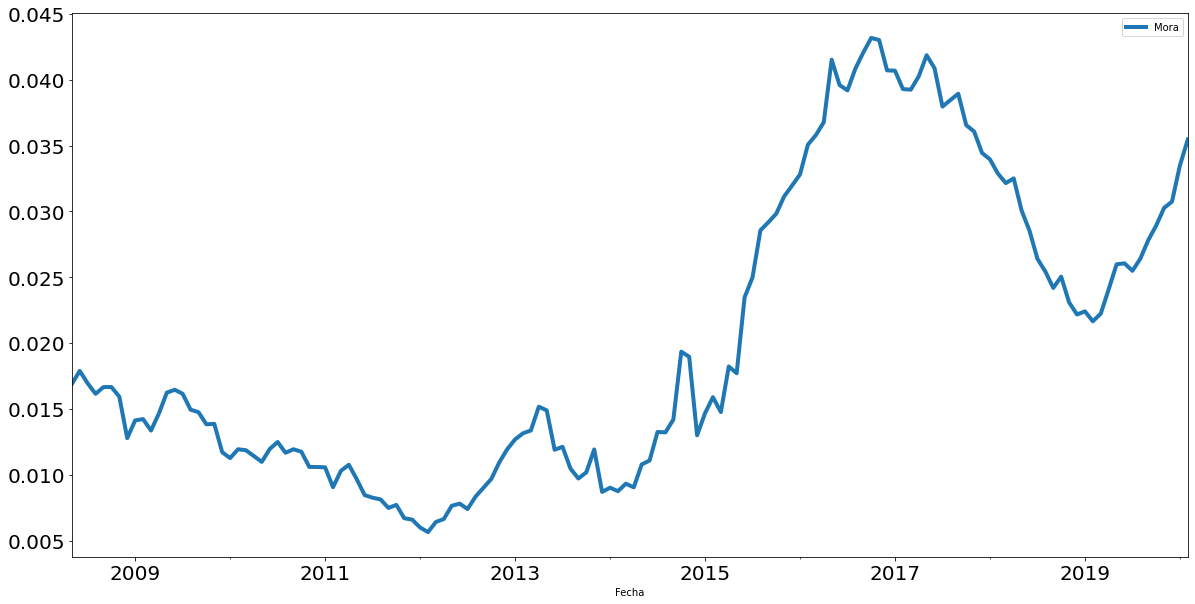

In [38]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
VarDep = df_dep1[['Fecha','Mora']]
VarDep.Fecha = pd.to_datetime(VarDep.Fecha)
VarDep.set_index('Fecha', inplace=True)
VarDep.plot(figsize=(20,10),linewidth=4, fontsize=20)

In [39]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [41]:
print('Fecha Inicio: {}\nFecha Fin: {}'.format(VarDep.index.min(),VarDep.index.max()))

Fecha Inicio: 2008-05-31 00:00:00
Fecha Fin: 2020-02-29 00:00:00


In [43]:
VarDep.describe()


Mora
count  142.000000
mean     0.020222
std      0.011195
min      0.005652
25%      0.011136
50%      0.015914
75%      0.029665
max      0.043176

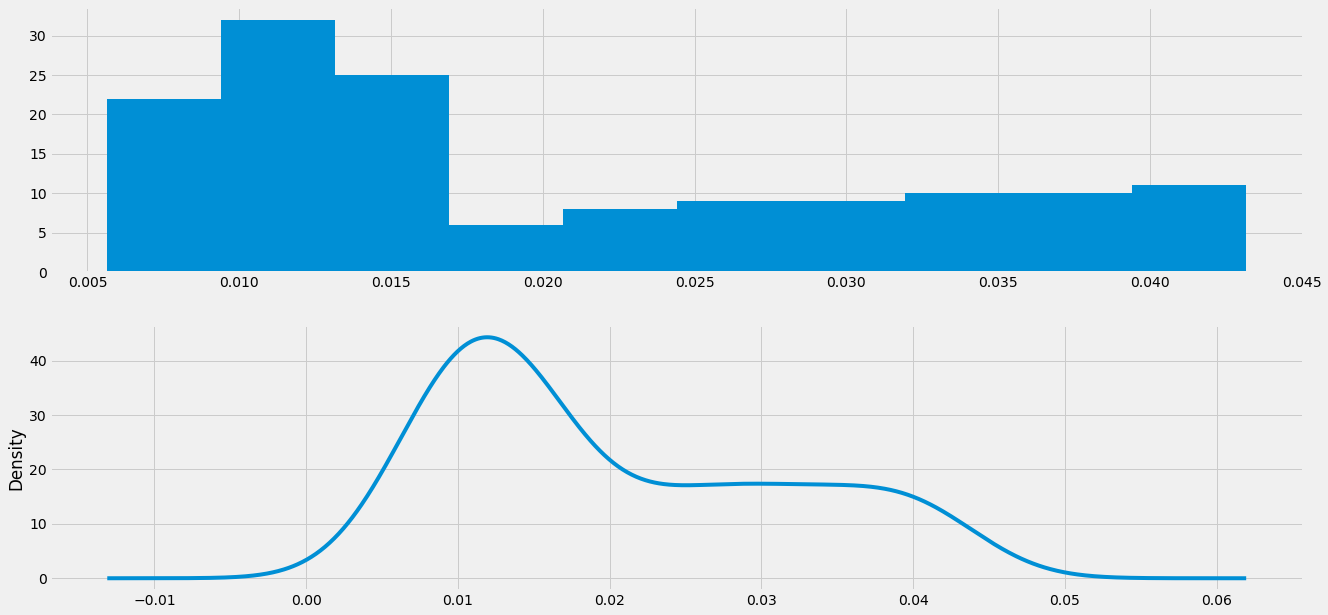

In [47]:
import itertools
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(211)
VarDep.Mora.hist(figsize=(20,10))
pyplot.subplot(212)
VarDep.Mora.plot(kind='kde')
pyplot.show()

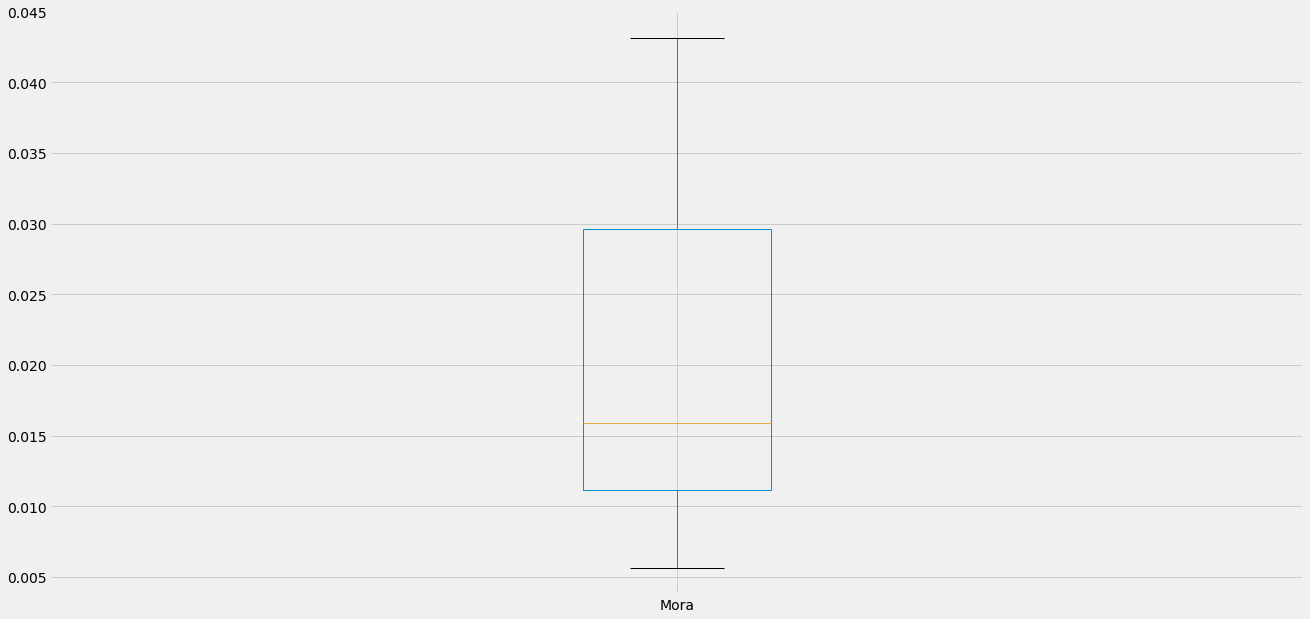

In [50]:
pyplot.figure(1)
VarDep.Mora.plot(figsize=(20,10),kind='box',showfliers=True)
pyplot.show()

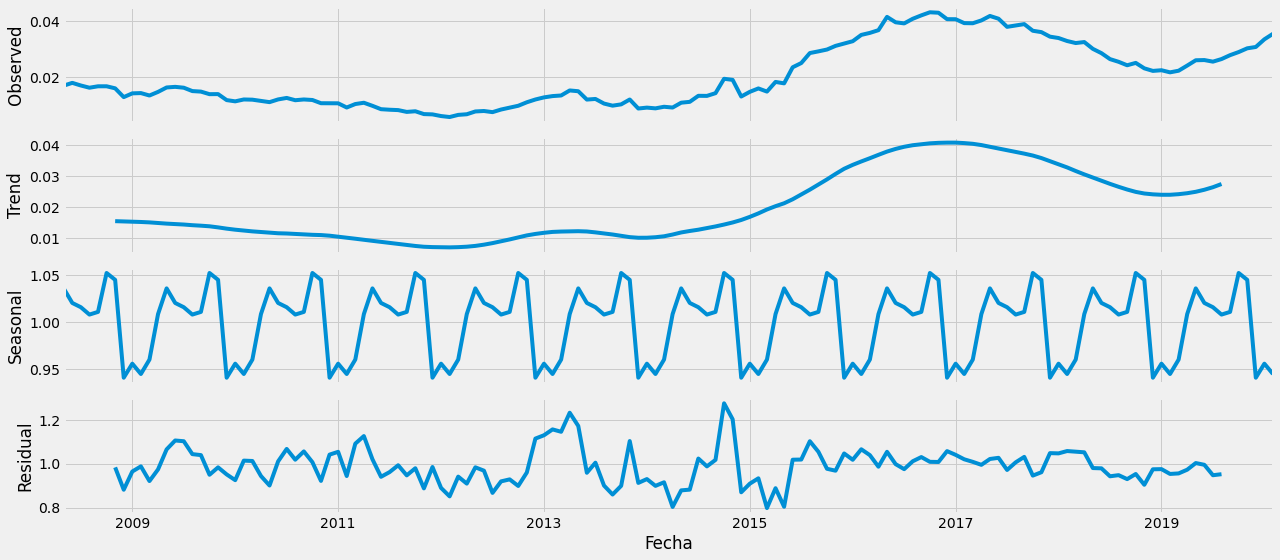

In [ ]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(VarDep.Mora, model='multiplicative')
fig = decomposition.plot()
plt.show()

### 2.2 Variables Explicativas

In [52]:
pandas_profiling.ProfileReport(nombres)

## 3. Aplicación Algorítmos ML
---

### 3.1 Modelo SARIMA


In [98]:
y = df_dep1[['Fecha','Mora']]
y['Fecha'] = pd.to_datetime(y['Fecha'], format='%Y-%m')
y = y.set_index('Fecha')
y.index

DatetimeIndex(['2008-05-31', '2008-06-30', '2008-07-31', '2008-08-31', '2008-09-30', '2008-10-31', '2008-11-30', '2008-12-31', '2009-01-31', '2009-02-28',
               ...
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29'], dtype='datetime64[ns]', name='Fecha', length=142, freq=None)

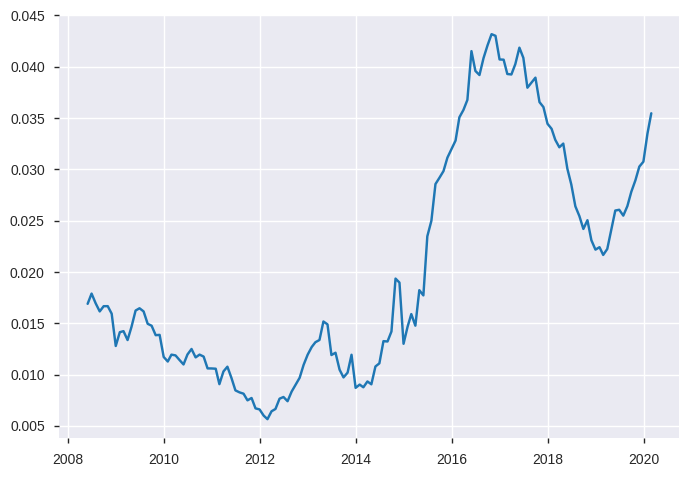

In [99]:
plt.plot(y)

La serie de Mora mantiene en ciertos intervalos una tendencia de crecimiento constante. En particular, este crecimiento se observa a partir del año 2014 hasta el año 2017, en donde se observa un decrecimiento que se da hasta principios del año 2019. Actualmente, es decir, en el último año, la tendencia de la serie es creciente. 

Para proceder a modelar este comportamiento, a continuación se exponen algunos indicadores relacionados con la media y varianza de la serie, esto con el objetivo de determinar su estacionariedad, y por lo tanto, estabilidad para en adecuado forecast. 



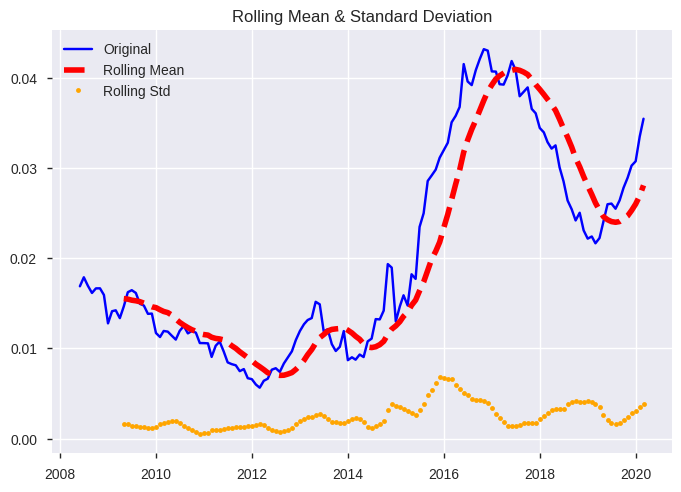

In [100]:
rolmean = pd.Series.rolling(y, window=12).mean()
rolstd = pd.Series.rolling(y, window=12).std()

orig = plt.plot(y, color='blue',label='Original')
mean = plt.plot(rolmean, '--',color='red', label='Rolling Mean',linewidth=4)
std = plt.plot(rolstd,'.', color='orange', label = 'Rolling Std',linewidth=4)
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Como se observa la media no es constante a lo largo del tiempo, esta primera aproximación gráfica permite concluir que la serie no es estacionaria. Este resultado, se comprueba a continuación definiendo pruebas de raiz unitaria. 

In [101]:
from statsmodels.tsa.stattools import adfuller
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(y.Mora, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -0.767847
p-value                          0.828385
#Lags Used                       3.000000
Number of Observations Used    138.000000
Critical Value (1%)             -3.478648
Critical Value (5%)             -2.882722
Critical Value (10%)            -2.578065
dtype: float64


El p-value es de 0.8283, por lo tanto se concluye que la serie mantiene una raiz unitaria, es decir no es estacionaria. Para modelar esta serie se considerará su primera diferencia.

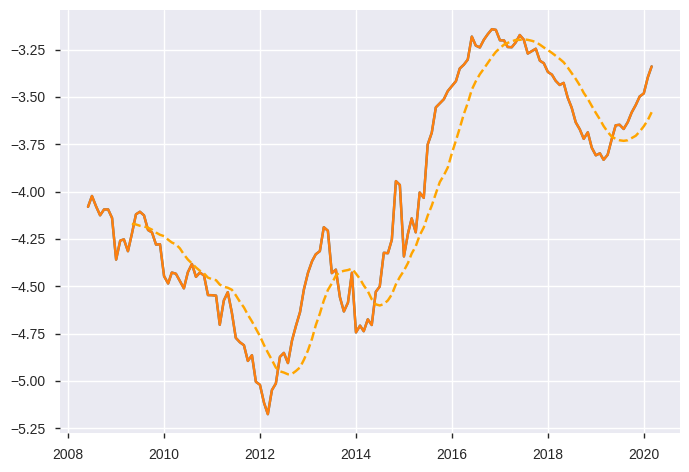

In [102]:
ts_log = np.log(y)
plt.plot(ts_log)
moving_avg = pd.Series.rolling(ts_log,12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, '--',color='orange')

In [103]:
print(ts_log)

                Mora
Fecha               
2008-05-31 -4.080823
2008-06-30 -4.023414
2008-07-31 -4.077724
2008-08-31 -4.125582
2008-09-30 -4.094657
...              ...
2019-10-31 -3.543022
2019-11-30 -3.497737
2019-12-31 -3.481979
2020-01-31 -3.396507
2020-02-29 -3.339190

[142 rows x 1 columns]


In [104]:

print(moving_avg.Mora)

Fecha
2008-05-31         NaN
2008-06-30         NaN
2008-07-31         NaN
2008-08-31         NaN
2008-09-30         NaN
                ...   
2019-10-31   -3.705455
2019-11-30   -3.682916
2019-12-31   -3.655681
2020-01-31   -3.622217
2020-02-29   -3.581122
Name: Mora, Length: 142, dtype: float64


In [105]:
#ts_log_moving_avg_diff = y.Mora-moving_avg.Mora
ts_log_moving_avg_diff = y.Mora.diff()
ts_log_moving_avg_diff.head(12)

Fecha
2008-05-31         NaN
2008-06-30    0.000998
2008-07-31   -0.000946
2008-08-31   -0.000792
2008-09-30    0.000507
2008-10-31    0.000005
2008-11-30   -0.000733
2008-12-31   -0.003148
2009-01-31    0.001345
2009-02-28    0.000100
2009-03-31   -0.000867
2009-04-30    0.001290
Name: Mora, dtype: float64

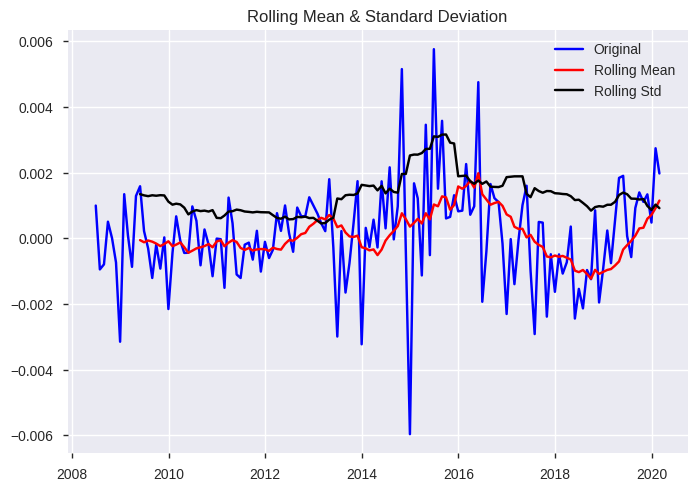

Results of Dickey-Fuller Test:
Test Statistic                  -4.708285
p-value                          0.000081
#Lags Used                       2.000000
Number of Observations Used    138.000000
Critical Value (1%)             -3.478648
Critical Value (5%)             -2.882722
Critical Value (10%)            -2.578065
dtype: float64


In [106]:

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series.rolling(timeseries, window=12).mean()
    rolstd = pd.Series.rolling(timeseries, window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

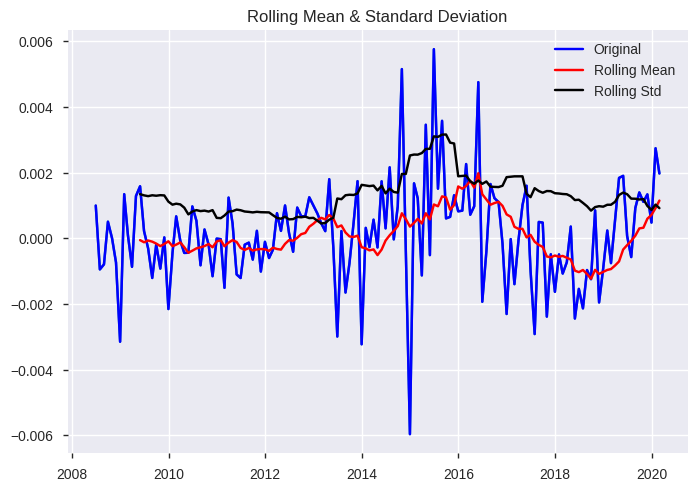

Results of Dickey-Fuller Test:
Test Statistic                  -4.708285
p-value                          0.000081
#Lags Used                       2.000000
Number of Observations Used    138.000000
Critical Value (1%)             -3.478648
Critical Value (5%)             -2.882722
Critical Value (10%)            -2.578065
dtype: float64


In [107]:
#ts_log_diff = ts_log.Mora - ts_log.Mora.shift()
ts_log_diff = y.Mora.diff()
plt.plot(ts_log_diff)
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [108]:
from statsmodels.tsa.ar_model import AR
from random import random

# fit model
#model = AR(ts_log_diff)
#model_fit = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


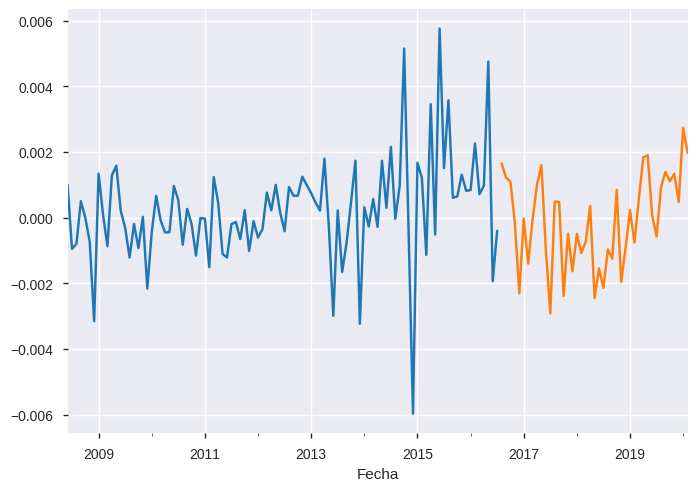

In [113]:
#divide into train and validation set
train = ts_log_diff[:int(0.70*(len(ts_log_diff)))]
valid = ts_log_diff[int(0.70*(len(ts_log_diff))):]

#plotting the data
train.plot()
valid.plot()
# fit model
model = AR(train)
model_fit = model.fit()

In [115]:
start_index = valid.index.min()
end_index = valid.index.max()

print(start_index)
print(end_index)


2016-08-31 00:00:00
2020-02-29 00:00:00


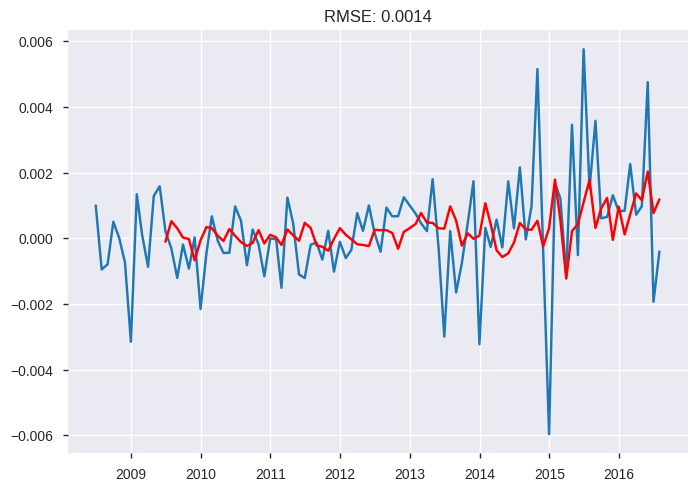

In [116]:
#plt.plot(ts_log_diff)
plt.plot(train)
plt.plot(model_fit.fittedvalues, color='red')
#plt.title('Ajuste a los Datos Reales\nRSS: %.4f'% np.nansum((model_fit.fittedvalues-ts_log_diff)**2))
plt.title('RMSE: %.4f'% np.sqrt(np.nansum((model_fit.fittedvalues-train)**2)/len(train)))

plt.show()



In [117]:
#Predictions
predictions = model_fit.predict(start=start_index, end=end_index)
predictions

2016-08-31    0.001551
2016-09-30    0.000301
2016-10-31    0.000063
2016-11-30    0.000889
2016-12-31    0.000391
2017-01-31    0.001220
2017-02-28    0.000996
2017-03-31    0.000301
2017-04-30    0.000977
2017-05-31    0.000419
2017-06-30    0.000296
2017-07-31    0.000602
2017-08-31    0.000392
2017-09-30    0.000339
2017-10-31    0.000649
2017-11-30    0.000473
2017-12-31    0.000545
2018-01-31    0.000593
2018-02-28    0.000431
2018-03-31    0.000501
2018-04-30    0.000466
2018-05-31    0.000377
2018-06-30    0.000434
2018-07-31    0.000428
2018-08-31    0.000395
2018-09-30    0.000458
2018-10-31    0.000433
2018-11-30    0.000426
2018-12-31    0.000446
2019-01-31    0.000414
2019-02-28    0.000409
2019-03-31    0.000412
2019-04-30    0.000390
2019-05-31    0.000395
2019-06-30    0.000401
2019-07-31    0.000390
2019-08-31    0.000400
2019-09-30    0.000399
2019-10-31    0.000393
2019-11-30    0.000396
2019-12-31    0.000391
2020-01-31    0.000386
2020-02-29    0.000387
Freq: M, dt

In [118]:
predictions_ARIMA_diff_cumsum = predictions.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

2016-08-31    0.001551
2016-09-30    0.001852
2016-10-31    0.001915
2016-11-30    0.002804
2016-12-31    0.003194
Freq: M, dtype: float64


In [128]:
valid2 = VarDep.Mora[int(0.70*(len(VarDep.Mora))):]
predictions_ARIMA_log = pd.Series(valid2.iloc[0], index=valid2.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()


Fecha
2016-08-31    0.042399
2016-09-30    0.042700
2016-10-31    0.042763
2016-11-30    0.043652
2016-12-31    0.044042
dtype: float64

In [129]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(valid2,predictions_ARIMA_log)
rmse = sqrt(mse)
print('RMSE: {}, MSE:{}'.format(rmse,mse))

RMSE: 0.02398356339524767, MSE:0.0005752113131338641


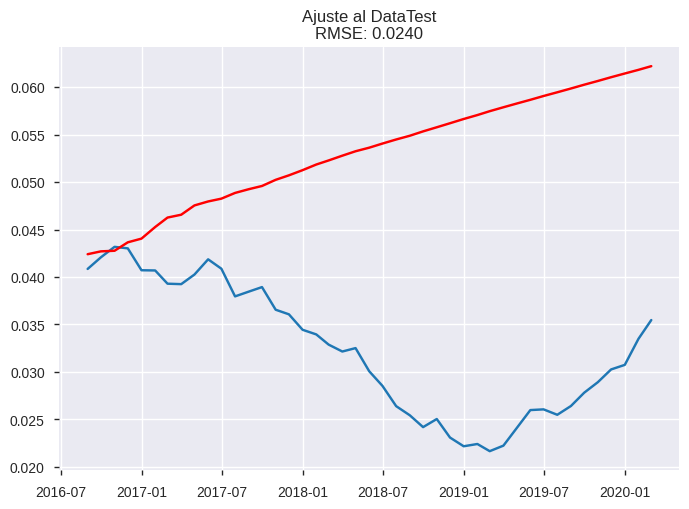

In [134]:
plt.plot(valid2)
plt.plot(predictions_ARIMA_log, color='red')
plt.title('Ajuste al DataTest\nRMSE: %.4f'%rmse)
plt.show()

### 3.2 Modelo ARMA

In [ ]:
from statsmodels.tsa.arima_model import ARMA
from random import random

# fit model
model = ARMA(ts_log_diff, order=(3, 1))
model_fit = model.fit(disp=False)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Mora   No. Observations:                  141
Model:                     ARMA(3, 1)   Log Likelihood                 719.586
Method:                       css-mle   S.D. of innovations              0.001
Date:                Tue, 30 Jun 2020   AIC                          -1427.172
Time:                        01:50:33   BIC                          -1409.480
Sample:                    06-30-2008   HQIC                         -1419.983
                         - 02-29-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.654      0.514      -0.000       0.001
ar.L1.Mora     0.6055      0.256      2.369      0.019       0.105       1.106
ar.L2.Mora    -0.0017      0.099     -0.017      0.986      -0.197       0.193
ar.L3.Mora     0.1854      0.102      1.826      0.070      -0.014       0.385
ma.L1.Mora    -0.5601      0.257     -2.181      0.031      -1.064      -0.057
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1678           -0.0000j            1.1678           -0.0000
AR.2           -0.5792           -2.0694j            2.1489           -0.2934
AR.3           -0.5792           +2.0694j            2.1489            0.2934
MA.1            1.7853           +0.0000j            1.7853            0.0000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'RSS: 0.0003')

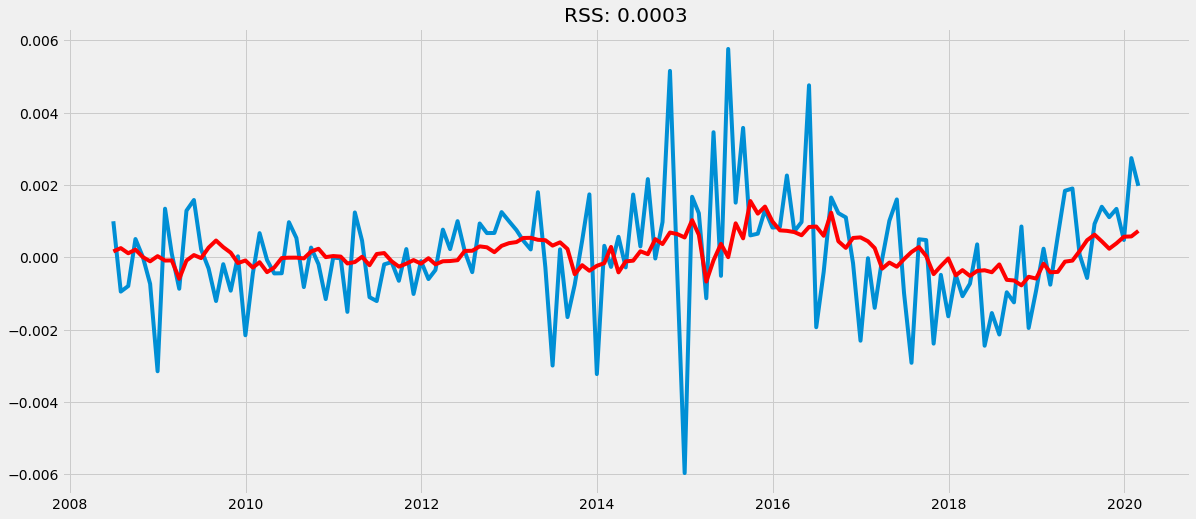

In [ ]:
plt.plot(ts_log_diff)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.nansum((model_fit.fittedvalues-ts_log_diff)**2))

### 3.3 Modelo ARIMA

In [158]:
ts = y.Mora - y.Mora.shift()
ts.dropna(inplace=True)

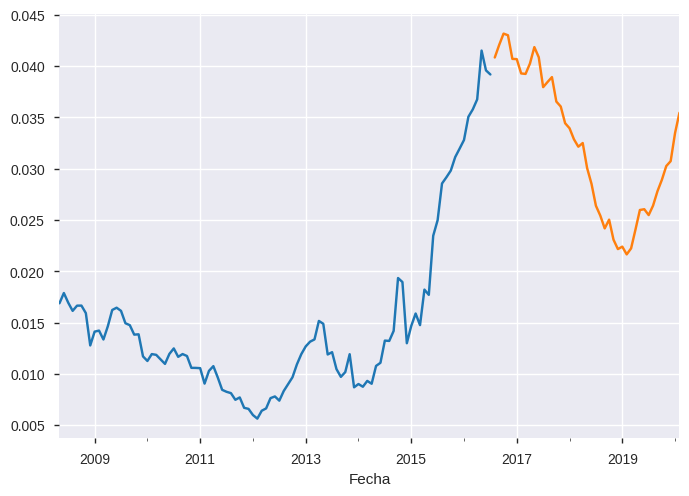

In [160]:
#divide into train and validation set
train = y[:int(0.70*(len(y)))]
valid = y[int(0.70*(len(y))):]

#plotting the data
train['Mora'].plot()
valid['Mora'].plot()

In [162]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# fit model
model = ARIMA(train, order=(2, 1, 1))
model_fit = model.fit(disp=1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [163]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Mora   No. Observations:                   98
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 492.832
Method:                       css-mle   S.D. of innovations              0.002
Date:                Thu, 02 Jul 2020   AIC                           -975.665
Time:                        04:15:27   BIC                           -962.740
Sample:                    06-30-2008   HQIC                          -970.437
                         - 07-31-2016                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0002      0.000      1.507      0.135   -6.82e-05       0.001
ar.L1.D.Mora     1.0030      0.101      9.940      0.000       0.805       1.201
ar.L2.D.Mora    -0.0057      0.101     -0.057      0.955      -0.203       0.192
ma.L1.D.Mora    -1.0000      0.009   -108.371      0.000      -1.018      -0.982
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0028           +0.0000j            1.0028            0.0000
AR.2          173.7916           +0.0000j          173.7916            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [148]:
start_index = valid.index.min()
end_index = valid.index.max()

#Predictions
predictions = model_fit.predict(start=start_index, end=end_index)
print(predictions)

2016-08-31    0.001599
2016-09-30   -0.000126
2016-10-31    0.000029
2016-11-30    0.000016
2016-12-31    0.000017
2017-01-31    0.000017
2017-02-28    0.000017
2017-03-31    0.000017
2017-04-30    0.000017
2017-05-31    0.000017
2017-06-30    0.000017
2017-07-31    0.000017
2017-08-31    0.000017
2017-09-30    0.000017
2017-10-31    0.000017
2017-11-30    0.000017
2017-12-31    0.000017
2018-01-31    0.000017
2018-02-28    0.000017
2018-03-31    0.000017
2018-04-30    0.000017
2018-05-31    0.000017
2018-06-30    0.000017
2018-07-31    0.000017
2018-08-31    0.000017
2018-09-30    0.000017
2018-10-31    0.000017
2018-11-30    0.000017
2018-12-31    0.000017
2019-01-31    0.000017
2019-02-28    0.000017
2019-03-31    0.000017
2019-04-30    0.000017
2019-05-31    0.000017
2019-06-30    0.000017
2019-07-31    0.000017
2019-08-31    0.000017
2019-09-30    0.000017
2019-10-31    0.000017
2019-11-30    0.000017
2019-12-31    0.000017
2020-01-31    0.000017
2020-02-29    0.000017
Freq: M, dt

In [165]:
predictions_ARIMA_diff_cumsum = predictions.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

2016-08-31    0.001599
2016-09-30    0.001473
2016-10-31    0.001503
2016-11-30    0.001518
2016-12-31    0.001535
Freq: M, dtype: float64


In [166]:
valid2 = VarDep.Mora[int(0.70*(len(VarDep.Mora))):]
predictions_ARIMA_log = pd.Series(valid2.iloc[0], index=valid2.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Fecha
2016-08-31    0.042447
2016-09-30    0.042321
2016-10-31    0.042351
2016-11-30    0.042366
2016-12-31    0.042383
dtype: float64

In [167]:
# report performance
mse = mean_squared_error(y[start_index:end_index], predictions_ARIMA_log)
rmse = sqrt(mse)
print('RMSE: {}, MSE:{}'.format(rmse,mse))

RMSE: 0.01245739474375824, MSE:0.00015518668380181547


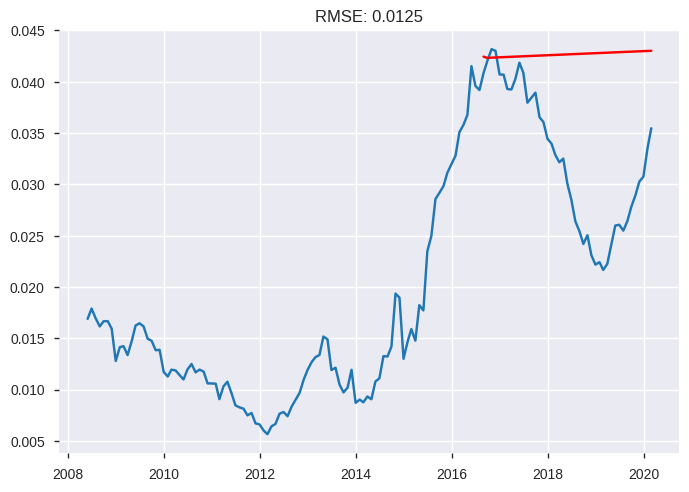

In [168]:
plt.plot(y.Mora)
plt.plot(predictions_ARIMA_log, color='red')
plt.title('RMSE: %.4f'% rmse)
plt.show()

### 3.3 Modelo AUTO SARIMA


In [170]:
!pip install pyramid-arima

     |████████████████████████████████| 604kB 2.7MB/s 


In [171]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 2.8MB/s 
     |████████████████████████████████| 8.7MB 17.1MB/s 
     |████████████████████████████████| 2.1MB 45.2MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.20
    Uninstalling Cython-0.29.20:
      Successfully uninstalled Cython-0.29.20


In [116]:
import pyramid as pm
pm.__version__

'0.9.0'

In [117]:
import pandas as pd

df = pd.read_excel("/content/drive/My Drive/Bases Modelo Forecast/Variables_Modelo.xlsx" )
df_dep1= df.loc[df.Fecha >= '2008-05-01'].copy()
y = df_dep1[['Fecha','Mora']]
y['Fecha'] = pd.to_datetime(y['Fecha'], format='%Y-%m')
y = y.set_index('Fecha')
y.index

train = y[:int(0.70*(len(y)))]
valid = y[int(0.70*(len(y))):]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [118]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(train, start_p=2, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(2, 1, 1); AIC=-975.671, BIC=-962.747, Fit time=0.279 seconds
Fit ARIMA: order=(0, 1, 0); AIC=-981.580, BIC=-976.410, Fit time=0.010 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-979.582, BIC=-971.827, Fit time=0.038 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-979.582, BIC=-971.827, Fit time=0.039 seconds
Fit ARIMA: order=(1, 1, 1); AIC=-978.377, BIC=-968.038, Fit time=0.166 seconds
Total fit time: 0.534 seconds


In [119]:
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [120]:
valid.shape

(43, 1)

In [121]:
future_forecast = stepwise_model.predict(n_periods=43)
future_forecast = pd.DataFrame(future_forecast, index=valid.index, columns=['prediction'])
test_data_evaluation = pd.concat([valid, future_forecast], axis=1)

print(test_data_evaluation)

                Mora  prediction
Fecha                           
2016-08-31  0.040848    0.039421
2016-09-30  0.042071    0.039649
2016-10-31  0.043176    0.039876
2016-11-30  0.043015    0.040104
2016-12-31  0.040711    0.040331
2017-01-31  0.040689    0.040559
2017-02-28  0.039294    0.040786
2017-03-31  0.039247    0.041014
2017-04-30  0.040259    0.041241
2017-05-31  0.041861    0.041469
2017-06-30  0.040872    0.041697
2017-07-31  0.037958    0.041924
2017-08-31  0.038459    0.042152
2017-09-30  0.038937    0.042379
2017-10-31  0.036553    0.042607
2017-11-30  0.036070    0.042834
2017-12-31  0.034442    0.043062
2018-01-31  0.033953    0.043289
2018-02-28  0.032880    0.043517
2018-03-31  0.032153    0.043745
2018-04-30  0.032512    0.043972
2018-05-31  0.030070    0.044200
2018-06-30  0.028532    0.044427
2018-07-31  0.026400    0.044655
2018-08-31  0.025435    0.044882
2018-09-30  0.024192    0.045110
2018-10-31  0.025045    0.045337
2018-11-30  0.023093    0.045565
2018-12-31

In [122]:
# report performance
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
start_index = valid.index.min()
end_index = valid.index.max()
mse = mean_squared_error(valid[start_index:end_index],future_forecast)
rmse_ar = sqrt(mse)
print('RMSE: {}, MSE:{}'.format(rmse_ar,mse))

RMSE: 0.014997375566093974, MSE:0.00022492127387047255


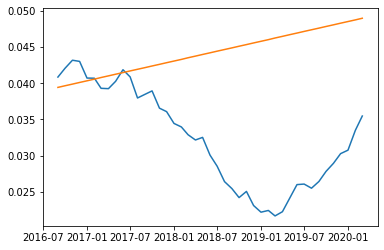

In [123]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.plot(test_data_evaluation.Mora)
plt.plot(test_data_evaluation.prediction)
plt.show()

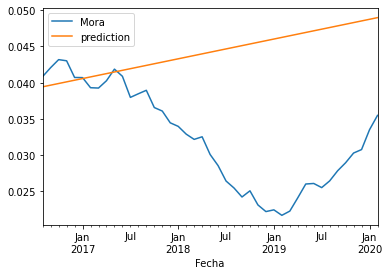

In [124]:
ax = test_data_evaluation.plot()
fig = ax.get_figure()

### 3.4 Modelo de Red Neuronal

In [125]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from google.colab import files
import io

In [126]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
 
# fix random seed for reproducibility
numpy.random.seed(7)

In [127]:
df = pd.read_excel("/content/drive/My Drive/Bases Modelo Forecast/Variables_Modelo.xlsx" )
df_dep1= df.loc[df.Fecha >= '2008-05-01'].copy()
y = df_dep1[['Mora']]
dataset = y.values
dataset = dataset.astype('float32')

In [128]:
# split into train and test sets
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [129]:
# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [130]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='sigmoid'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)

Epoch 1/400
 - 0s - loss: 0.2833
Epoch 2/400
 - 0s - loss: 0.0929
Epoch 3/400
 - 0s - loss: 0.0275
Epoch 4/400
 - 0s - loss: 0.0071
Epoch 5/400
 - 0s - loss: 0.0016
Epoch 6/400
 - 0s - loss: 3.4061e-04
Epoch 7/400
 - 0s - loss: 1.1004e-04
Epoch 8/400
 - 0s - loss: 7.6809e-05
Epoch 9/400
 - 0s - loss: 7.3276e-05
Epoch 10/400
 - 0s - loss: 7.1836e-05
Epoch 11/400
 - 0s - loss: 7.2135e-05
Epoch 12/400
 - 0s - loss: 7.2131e-05
Epoch 13/400
 - 0s - loss: 7.1849e-05
Epoch 14/400
 - 0s - loss: 7.2349e-05
Epoch 15/400
 - 0s - loss: 7.1262e-05
Epoch 16/400
 - 0s - loss: 7.1625e-05
Epoch 17/400
 - 0s - loss: 7.1722e-05
Epoch 18/400
 - 0s - loss: 7.2111e-05
Epoch 19/400
 - 0s - loss: 7.1150e-05
Epoch 20/400
 - 0s - loss: 7.1207e-05
Epoch 21/400
 - 0s - loss: 7.1529e-05
Epoch 22/400
 - 0s - loss: 7.1731e-05
Epoch 23/400
 - 0s - loss: 7.2154e-05
Epoch 24/400
 - 0s - loss: 7.0849e-05
Epoch 25/400
 - 0s - loss: 7.0186e-05
Epoch 26/400
 - 0s - loss: 7.0638e-05
Epoch 27/400
 - 0s - loss: 7.0010e-05
Epo

In [131]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

rmse_rn=math.sqrt(testScore)

Train Score: 0.0000 MSE (0.0018 RMSE)
Test Score: 0.0000 MSE (0.0035 RMSE)


In [132]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [133]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [134]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

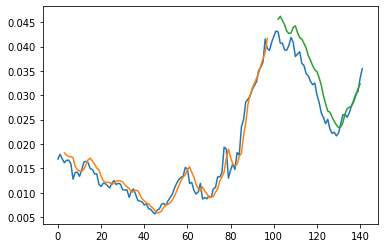

In [135]:
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

plt.show()

### 3.5 Modelo KNN

In [136]:
df = pd.read_excel("/content/drive/My Drive/Bases Modelo Forecast/Variables_Modelo_Imputadas.xlsx" )
df.head()

Letra       IDAEC       EMBI  ...        ICC  RiesgoPais      Mora
0   AMD   96.047812   5.669365  ...  30.408904    5.619382  0.016894
1   AMD   95.702485   6.650719  ...  32.428954    5.669365  0.017892
2   AMD   98.766308   6.998768  ...  31.465121    6.650719  0.016946
3   AMD  105.260425   8.875523  ...  37.087081    6.998768  0.016154
4   AMD  105.619786  19.873322  ...  38.137553    8.875523  0.016661

[5 rows x 125 columns]

In [137]:
from sklearn.preprocessing import StandardScaler

In [138]:
scaler = StandardScaler()

In [139]:
Eliminar1 = ['Letra']
df_dep2=df.drop(Eliminar1,axis=1)
scaler.fit(df_dep2.drop('Mora', axis=1))


StandardScaler(copy=True, with_mean=True, with_std=True)

In [140]:
scaled_features = scaler.transform(df_dep2.drop('Mora', axis=1))

In [141]:
df_feat = pd.DataFrame(scaled_features, columns = df_dep2.columns[:-1])

In [142]:
df_feat.head()
print(df_feat.shape)
print(df_dep2.Mora.shape)

(142, 123)
(142,)


In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X = df_feat
y = df_dep2['Mora']
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [145]:
print(y_train)

102    0.043015
37     0.008458
39     0.008134
103    0.040711
6      0.015933
         ...   
63     0.010476
70     0.009327
81     0.015895
11     0.014654
95     0.036767
Name: Mora, Length: 99, dtype: float64


In [146]:
from sklearn.neighbors import KNeighborsRegressor

In [147]:
knn = KNeighborsRegressor(n_neighbors = 3)

In [148]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [149]:
pred = knn.predict(X_test)

In [150]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [152]:
mse = mean_squared_error(y_test,pred)
rmse_knn = sqrt(mse)
print('RMSE: {}, MSE:{}'.format(rmse_knn,mse))

RMSE: 0.0030780421198294446, MSE:9.47434329144414e-06


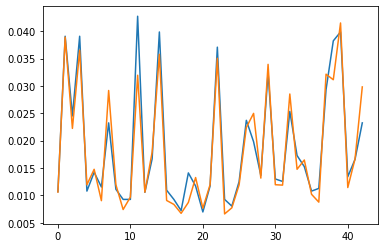

In [153]:
import matplotlib.pyplot as plt
plt.plot(pred)
plt.plot(y_test.values)
plt.show()

In [154]:
import numpy as np
error_rate = []
for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

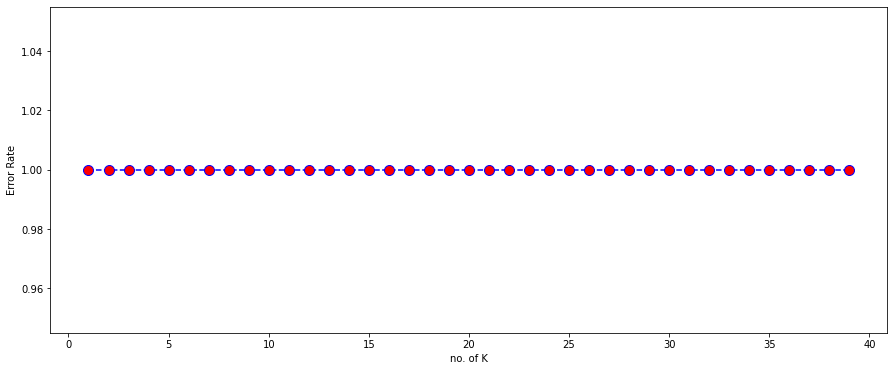

In [155]:
plt.figure(figsize=(15,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
plt.xlabel('no. of K')
plt.ylabel('Error Rate')


### 3.6 Modelo Regresion LASSO


In [168]:
import sys
import numpy as np
import pandas as pd
import scipy as scp
import sklearn as skl
import matplotlib as plt
import seaborn as sb
import statsmodels as sm

In [169]:
df = pd.read_excel("/content/drive/My Drive/Bases Modelo Forecast/Variables_Modelo_Imputadas.xlsx" )
df.head()

Letra       IDAEC       EMBI  ...        ICC  RiesgoPais      Mora
0   AMD   96.047812   5.669365  ...  30.408904    5.619382  0.016894
1   AMD   95.702485   6.650719  ...  32.428954    5.669365  0.017892
2   AMD   98.766308   6.998768  ...  31.465121    6.650719  0.016946
3   AMD  105.260425   8.875523  ...  37.087081    6.998768  0.016154
4   AMD  105.619786  19.873322  ...  38.137553    8.875523  0.016661

[5 rows x 125 columns]

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

#Regularizacion/Penalizacion
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#GridSearch
from sklearn.model_selection import GridSearchCV

# Graficos
import matplotlib.pyplot as plt
#%matplotlib inline

In [171]:
scaler = StandardScaler()
Eliminar1 = ['Letra']
df_dep2=df.drop(Eliminar1,axis=1)
scaler.fit(df_dep2.drop('Mora', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [172]:
scaled_features = scaler.transform(df_dep2.drop('Mora', axis=1))
df_feat = pd.DataFrame(scaled_features, columns = df_dep2.columns[:-1])

In [173]:
df_feat.head()

IDAEC      EMBI  PrecioPetroleo  ...  ICC_EXPECTATIVA       ICC  RiesgoPais
0 -2.240964 -0.546132        2.364249  ...        -2.257764 -2.050036   -0.551609
1 -2.256691 -0.403733        2.914363  ...        -1.882510 -1.701035   -0.544361
2 -2.117160 -0.353229        2.222046  ...        -1.513802 -1.867555   -0.402053
3 -1.821409 -0.080903        1.847186  ...        -0.859479 -0.896259   -0.351582
4 -1.805043  1.514931        1.202705  ...        -0.495904 -0.714771   -0.079430

[5 rows x 123 columns]

In [174]:
x = df_feat
y = df_dep2[['Mora']].values
# 

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=101)

In [175]:
lambdaValue = 1e-3

mlLasso = Lasso(alpha = lambdaValue, fit_intercept=True, normalize=True)
mlLasso.fit(xTrain, yTrain)
yHatL = mlLasso.predict(xTest)

mseL  = metrics.mean_squared_error(yTest, yHatL)  
r2scoreL = metrics.r2_score(yTest, yHatL)

print("{:3}:{:8}, {:3}:{:8}".format('Lambda',lambdaValue,'MSE',round(mseL,6),'R^2',round(r2scoreL,2)))

Lambda:   0.001, MSE: 0.00012


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.551103036049049e-06, tolerance: 1.1149538055394265e-06
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7671302847177015e-06, tolerance: 1.1304927728018938e-06
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.820939245339701e-06, tolerance: 1.1398615155197175e-06
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

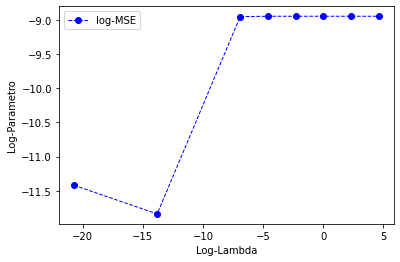

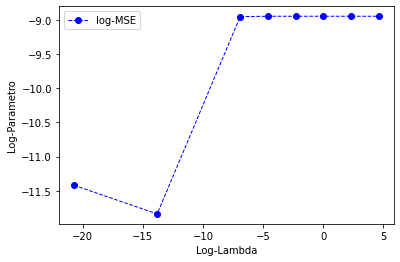

In [176]:
#GridSearch
numFolds = 10
gridValues = {'alpha': [1e-9, 1e-6, 1e-3, 1e-2, 0.1, 1, 10, 1e2]}

grid = GridSearchCV(cv=numFolds, estimator=mlLasso, param_grid=gridValues,
                     scoring = 'neg_mean_squared_error')
grid_result = grid.fit(xTrain,yTrain)

#Resultados
resultsDF = pd.DataFrame(grid_result.cv_results_)
mseListaL = resultsDF.mean_test_score*-1

#Plot
fig1 = plt.figure()
plt.plot(np.log(resultsDF.param_alpha.tolist()), np.log(mseListaL), 'bo', lw=1, linestyle='--', label='log-MSE')
plt.legend(loc = 'best')
plt.xlabel("Log-Lambda")
plt.ylabel("Log-Parametro")
display(fig1)

In [177]:
print(resultsDF[['mean_test_score','param_alpha']])

print('\nMínimo MSE:', grid.best_score_*-1)
print('Lambda Optimo (Lasso):', grid.best_estimator_.alpha)

   mean_test_score param_alpha
0        -0.000011       1e-09
1        -0.000007       1e-06
2        -0.000130       0.001
3        -0.000131        0.01
4        -0.000131         0.1
5        -0.000131           1
6        -0.000131          10
7        -0.000131         100

Mínimo MSE: 7.206185240213767e-06
Lambda Optimo (Lasso): 1e-06


In [179]:
lambdaValue = grid.best_estimator_.alpha

mlLasso = Lasso(alpha = lambdaValue, fit_intercept=True, normalize=True)
mlLasso.fit(xTrain, yTrain)
yHatL = mlLasso.predict(xTest)

mseL_rl  = sqrt(metrics.mean_squared_error(yTest, yHatL))  
r2scoreL = metrics.r2_score(yTest, yHatL)

print("{:3}:{:8}, {:3}:{:8}".format('Lambda',lambdaValue,'RMSE',round(mseL_rl,6),'R^2',round(r2scoreL,2)))

Lambda:   1e-06, RMSE:0.001913


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.062183502935467e-05, tolerance: 1.2622919412800982e-06
  positive)


In [180]:
coeffs = mlLasso.coef_         # dense np.array
coeffs = mlLasso.sparse_coef_ 

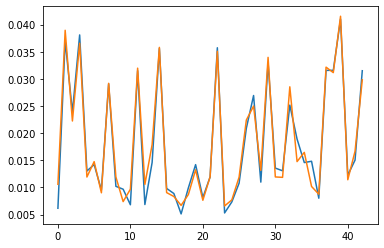

In [181]:
import matplotlib.pyplot as plt
plt.plot(yHatL)
plt.plot(yTest)
plt.show()

In [182]:
coef_table = pd.DataFrame(list(xTrain.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",mlLasso.coef_.transpose())
print(coef_table)

                               0     Coefs
0                          IDAEC -0.000000
1                           EMBI  0.000216
2                 PrecioPetroleo -0.001282
3                   ICE_COMERCIO  0.000712
4               ICE_CONSTRUCCION -0.000000
..                           ...       ...
118  Obligaciones con el público  0.000000
119                 ICC_presente -0.000625
120              ICC_EXPECTATIVA  0.000000
121                          ICC -0.000000
122                   RiesgoPais  0.000219

[123 rows x 2 columns]


### 3.7 Modelo Support Vector Machine

In [183]:
from sklearn.svm import SVR

In [184]:
df = pd.read_excel("/content/drive/My Drive/Bases Modelo Forecast/Variables_Modelo_Imputadas.xlsx" )
df.shape

(142, 125)

In [185]:
scaler = StandardScaler()
Eliminar1 = ['Letra']
df_dep2=df.drop(Eliminar1,axis=1)
scaler.fit(df_dep2.drop('Mora', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [186]:
scaled_features = scaler.transform(df_dep2.drop('Mora', axis=1))
df_feat = pd.DataFrame(scaled_features, columns = df_dep2.columns[:-1])

In [187]:
X = df_feat
Y = df_dep2[['Mora']].values

In [188]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

regressor = SVR(kernel = 'rbf', C=1000, epsilon=0.0001)
regressor.fit(X_Train, Y_Train)

y_pred = regressor.predict(X_Test)
# Invert y_pred result
#y_pred = sc_Y.inverse_transform(y_pred)
print(y_pred)

[0.00997016 0.0370513  0.02231254 0.03719976 0.01234143 0.01401517
 0.01134703 0.02772494 0.0137339  0.00909377 0.00908889 0.03233972
 0.01009562 0.01681485 0.03729431 0.0113871  0.00871925 0.00800597
 0.01495081 0.01219565 0.00708322 0.01216631 0.03335654 0.01024379
 0.00767606 0.01317466 0.02305864 0.02532764 0.01211241 0.03295757
 0.01234752 0.01191054 0.0265092  0.01955994 0.01511919 0.01327744
 0.00934555 0.02980373 0.03464001 0.03945394 0.01241894 0.01678104
 0.03194509]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [189]:
mse = mean_squared_error(Y_Test,y_pred)
rmse_svr = sqrt(mse)
print('RMSE: {}, MSE:{}'.format(rmse_svr,mse))

RMSE: 0.0019137102343848556, MSE:3.6622868611893387e-06


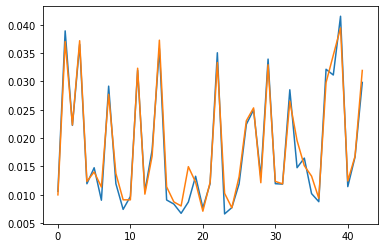

In [190]:
plt.plot(Y_Test)
plt.plot(y_pred)
plt.show()

## 4. Resultados
---

In [219]:
print("{:3}:{:8}, {:3}:{:8},{:3}:{:8}, {:3}:{:8}, {:3}:{:8}, {:3}:{:8}, {:3}:{:8}".format('SARIMA         ','0.02398356339524767','\nARIMA          ','0.01245739474375824','\nAuto ARIMA     ',rmse_ar,'\nRed Neuronal   ',rmse_rn,'\nKnn            ',rmse_knn,"\nReg Lasso      ",mseL_rl, "\nSVR            ",rmse_svr))

SARIMA         :0.02398356339524767, 
ARIMA          :0.01245739474375824,
Auto ARIMA     :0.014997375566093974, 
Red Neuronal   :0.0035060309342234966, 
Knn            :0.0030780421198294446, 
Reg Lasso      :0.00191326572020669, 
SVR            :0.0019137102343848556


## 5. Conclusiones
---



*   Modelos ARIMA no tienen un buen ajuste en comporación con los modelo KNN, LASSO, SVR y Red Neuronal.
*   Entre los modelos supervisados los modelos Reg Lasso y SVR tiene el menor error.
*   Entre estos se escogerá el modelo Lasso. 

